# Proyecto: Clasificación de Actividades

## Importación de DataFrame

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import scipy as sci

DIR='C:\Projects\Physical_activity_classifier/Smartphone_Dataset'
xdata,ydata,error=[],[],[]
Activities=['bike','climbing','descending','gymbike','jumping','running','standing','treadmill','walking']
for suj in range(1,10):#######################10
    print('Extrayendo datos S0{}'.format(suj))
    for act in range(0,9):###################9
        for k in range(1,6):
            path=DIR+'/S0'+str(suj)+'/'+Activities[act]+str(k)+'.csv'
            try:
                df=pd.read_csv(path,header=None)
                data=df.as_matrix()
                d_size=len(data)
                final_data=[]
                sensors=[[],[],[],[],[],[],[],[],[]]
                for i in range(0,d_size):
                    for j in range(0,9):
                        sensors[j].append(data[i][j])

                for j in range(0,9):
                    final_data.append(np.mean(sensors[j]))#Mean
                    final_data.append(np.var(sensors[j]))#Var
                    final_data.append(np.min(sensors[j]))#Min
                    final_data.append(np.max(sensors[j]))#Max
                    final_data.append(np.max(sensors[j])-np.min(sensors[j]))#Range
                    RMS=0
                    for i in range(0,d_size):
                        RMS+=np.sqrt((1/d_size)*sensors[j][i]*sensors[j][i])
                    final_data.append(RMS)#RMS
                    final_data.append(sci.stats.kurtosis(sensors[j]))#Kurtosis
                #-------------------Entropy----------------------
                for j in range(0,9):
                    H=sci.stats.entropy(sensors[j])
                    #final_data.append(H)    
                #-------------------EnergyExpenditure----------------------
                for j in range(0,3):
                    EE=0
                    for i in range(0,d_size):
                        EE+=(1/d_size)*np.sqrt(sensors[0+j*3][i]*sensors[0+j*3][i]+sensors[1+j*3][i]*sensors[1+j*3][i]+sensors[2+j*3][i]*sensors[2+j*3][i])
                    final_data.append(EE)#EE
                    SMA=0
                    for i in range(0,d_size):
                        SMA+=(1/d_size)*(np.abs(sensors[0+j*3][i])+np.abs(sensors[1+j*3][i])+np.abs(sensors[2+j*3][i]))
                    final_data.append(SMA)#SMA    
                
                xdata.append(final_data)
                ydata.append(act)
                
            except FileNotFoundError :
                estr=Activities[act]+str(k)
                error.append(estr)
                #print(path+' path doesn t exist')
        
    
print('Cantidad de datos: {}'.format(len(xdata)))
print('Cantidad de caracteristicas: {}'.format(len(xdata[0])))
x,y=[],[]
x_train,y_train=[],[]
x_val,y_val=[],[]
x_test,y_test=[],[]

x,x_test,y,y_test=train_test_split(xdata,ydata,test_size=0.2,shuffle=True)

Extrayendo datos S01
Extrayendo datos S02
Extrayendo datos S03
Extrayendo datos S04
Extrayendo datos S05
Extrayendo datos S06
Extrayendo datos S07
Extrayendo datos S08
Extrayendo datos S09
Cantidad de datos: 383
Cantidad de caracteristicas: 69


In [2]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = 100 * cm / cm.sum(1)
    plt.figure(figsize=(10,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.0f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import time
def ANN_train(xdata,ydata,hl_size=10,act='relu'):
    clf = MLPClassifier(activation=act,solver='lbfgs', hidden_layer_sizes=hl_size,
    early_stopping = True, validation_fraction = 0.25);
    
    xtrain,xval,ytrain,yval=train_test_split(xdata,ydata,random_state=clf.random_state,
                                                       test_size=clf.validation_fraction)
    clf.fit(xdata, np.ravel(ydata))
    return [clf,xtrain,xval,ytrain,yval]

## Redes Neuronales

Neural Network
-------------------------------------------------
Clasificaciones exitosas: 98.7012987012987%


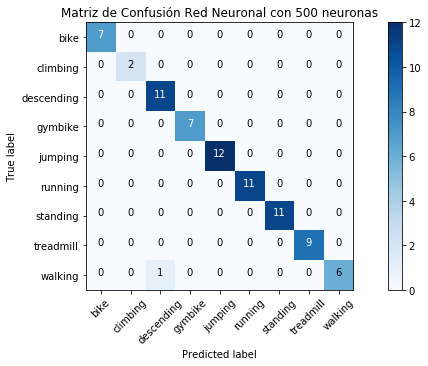

In [4]:
hl_s=[10,50,500] #hl_size_op=5000#(28+10)//2
from sklearn.metrics import accuracy_score
print('Neural Network')
print('-------------------------------------------------')
best_cm=None
best_acc,best_hls=0,0
for i in range(0,3):
    clf,x_train,x_val,y_train,y_val=ANN_train(x,y,hl_size=hl_s[i])
    y_pred=clf.predict(x_val)
    c_m=confusion_matrix(np.ravel(y_val), y_pred)
    acc=accuracy_score(y_val, y_pred)
    if acc>best_acc:
        best_acc=acc
        best_cm=c_m
        best_hls=hl_s[i]
title='Matriz de Confusión Red Neuronal con '+str(best_hls)+ ' neuronas'
#print('Tiempo de entrenamiento: {}s'.format(dt))
plot_confusion_matrix(best_cm,Activities,normalize=False,title=title)
print('Clasificaciones exitosas: {}%'.format(best_acc*100))

## Support Vector Machine

Support Vector Machine
-------------------------------------------------
Clasificaciones exitosas: 98.7012987012987%


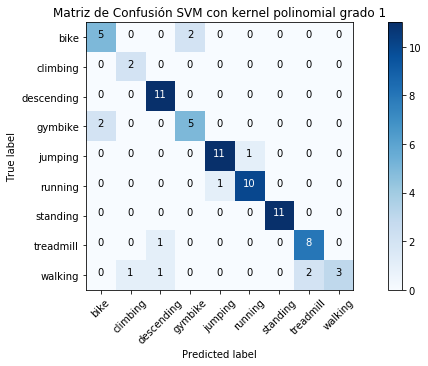

In [5]:
from sklearn.svm import SVC,LinearSVC
def svm_poly(x_train,y_train,x_test,y_test,deg=1):
    #Entrenamiento
    std_scale=skl.preprocessing.StandardScaler().fit(x_train)
    x_train_n = std_scale.transform(x_train)
    clf = SVC(kernel='poly',degree=deg)
    clf.fit(x_train_n, y_train)  
    #Validacion
    x_test_n = std_scale.transform(x_test)
    
    y_pred=clf.predict(x_test_n)
    c_m=confusion_matrix(np.ravel(y_test), y_pred)
    acc=accuracy_score(np.ravel(y_test), y_pred)
    return c_m,acc,deg

print('Support Vector Machine')
print('-------------------------------------------------')
result=[]
result.append(svm_poly(x_train,y_train,x_val,y_val,deg=1))
result.append(svm_poly(x_train,y_train,x_val,y_val,deg=2))
result.append(svm_poly(x_train,y_train,x_val,y_val,deg=3))
best_acc,best_deg=0,0
best_cm=None
for i in range(0,3):
    if result[i][1]>best_acc:
        best_acc=result[i][1]
        best_cm=result[i][0]
        best_deg=result[i][2]
title='Matriz de Confusión SVM con kernel polinomial grado '+str(best_deg)
plot_confusion_matrix(best_cm,Activities,title=title)
print('Clasificaciones exitosas: {}%'.format(acc*100))

## Naive Bayes

Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 85.71428571428571%


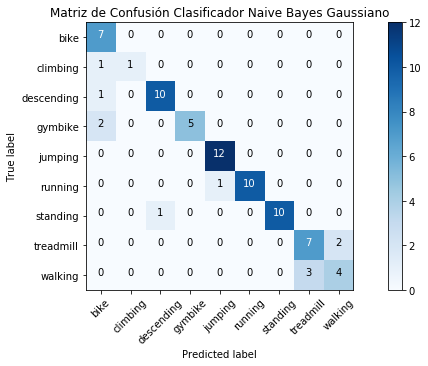

In [6]:
from sklearn.naive_bayes import GaussianNB
std_scale=skl.preprocessing.StandardScaler().fit(x_train)
x_train_n = std_scale.transform(x_train)
clf = GaussianNB().fit(x_train_n, y_train)
x_val_n = std_scale.transform(x_val)

print('Gaussian Naive Bayes')
print('-------------------------------------------------')
y_pred=clf.predict(x_val_n)
c_m=confusion_matrix(np.ravel(y_val), y_pred)
acc=accuracy_score(np.ravel(y_val), y_pred)
title='Matriz de Confusión Clasificador Naive Bayes Gaussiano'
plot_confusion_matrix(c_m,Activities,title=title)
print('Clasificaciones exitosas: {}%'.format(acc*100))

## Selección de características

feature size: 69 ---> 30


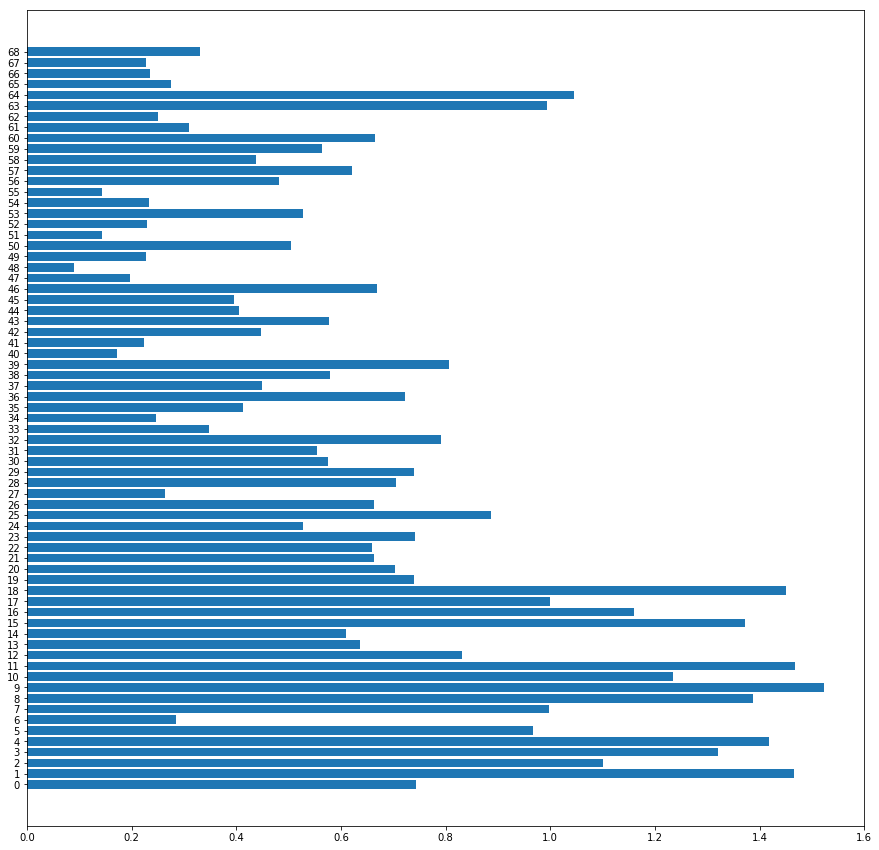

In [7]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(score_func=mutual_info_classif,k=30).fit(x_train, y_train)
x2= sel.transform(x)
print('feature size: {} ---> {}'.format(len(x[0]),len(x2[0])))
scores=sel.scores_
feature_s=len(x[0])
features=np.arange(0,feature_s,1)
plt.figure(figsize=(15,15))
plt.barh(range(feature_s),scores)
plt.yticks(range(feature_s),features)
plt.show()

Neural Network
-------------------------------------------------
Clasificaciones exitosas: 98.7012987012987%


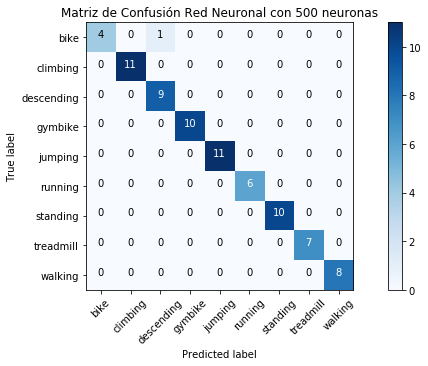

In [8]:
print('Neural Network')
print('-------------------------------------------------')
best_cm=None
best_acc,best_hls=0,0
for i in range(0,3):
    clf,x_train,x_val,y_train,y_val=ANN_train(x2,y,hl_size=hl_s[i])
    y_pred=clf.predict(x_val)
    c_m=confusion_matrix(np.ravel(y_val), y_pred)
    acc=accuracy_score(y_val, y_pred)
    if acc>best_acc:
        best_acc=acc
        best_cm=c_m
        best_hls=hl_s[i]
title='Matriz de Confusión Red Neuronal con '+str(best_hls)+ ' neuronas'
plot_confusion_matrix(best_cm,Activities,normalize=False,title=title)
print('Clasificaciones exitosas: {}%'.format(best_acc*100))

Support Vector Machine
-------------------------------------------------
Clasificaciones exitosas: 98.7012987012987%


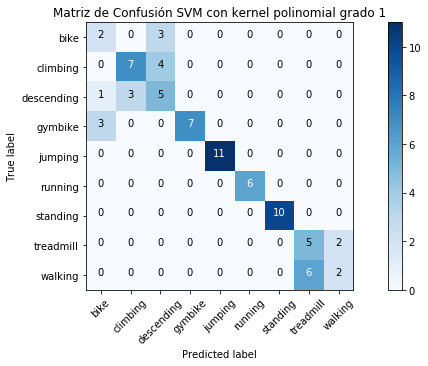

In [9]:
print('Support Vector Machine')
print('-------------------------------------------------')
result=[]
result.append(svm_poly(x_train,y_train,x_val,y_val,deg=1))
result.append(svm_poly(x_train,y_train,x_val,y_val,deg=2))
result.append(svm_poly(x_train,y_train,x_val,y_val,deg=3))
best_acc,best_deg=0,0
best_cm=None
for i in range(0,3):
    if result[i][1]>best_acc:
        best_acc=result[i][1]
        best_cm=result[i][0]
        best_deg=result[i][2]
title='Matriz de Confusión SVM con kernel polinomial grado '+str(best_deg)
plot_confusion_matrix(best_cm,Activities,title=title)
print('Clasificaciones exitosas: {}%'.format(acc*100))

Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 81.81818181818183%


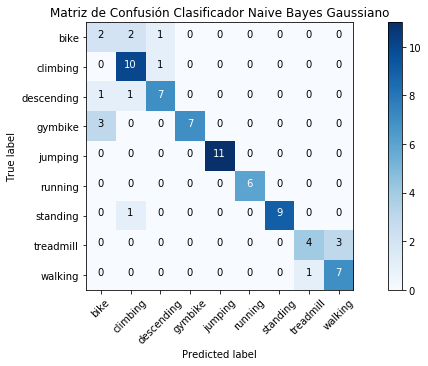

In [10]:
std_scale=skl.preprocessing.StandardScaler().fit(x_train)
x_train_n = std_scale.transform(x_train)
clf = GaussianNB().fit(x_train_n, y_train)
x_val_n = std_scale.transform(x_val)
print('Gaussian Naive Bayes')
print('-------------------------------------------------')
y_pred=clf.predict(x_val_n)
c_m=confusion_matrix(np.ravel(y_val), y_pred)
acc=accuracy_score(np.ravel(y_val), y_pred)
title='Matriz de Confusión Clasificador Naive Bayes Gaussiano'
plot_confusion_matrix(c_m,Activities,title=title)
print('Clasificaciones exitosas: {}%'.format(acc*100))

## Segunda Selección de Caracteríticas

In [12]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(score_func=mutual_info_classif,k=10).fit(x_train, y_train)
x3= sel.transform(x2)
print('feature size: {} ---> {}'.format(len(x2[0]),len(x3[0])))
scores=sel.scores_
feature_s=len(x2[0])
features=np.arange(0,feature_s,1)

feature size: 30 ---> 10


Neural Network
-------------------------------------------------
Clasificaciones exitosas: 96.1038961038961%


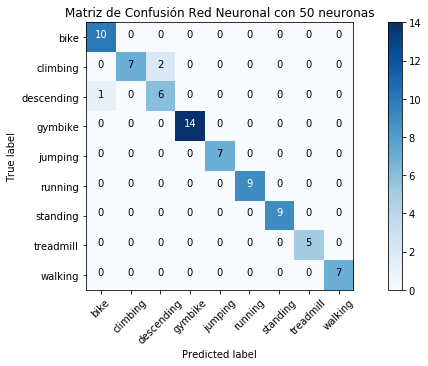

In [13]:
print('Neural Network')
print('-------------------------------------------------')
best_cm=None
best_acc,best_hls=0,0
for i in range(0,3):
    clf,x_train,x_val,y_train,y_val=ANN_train(x3,y,hl_size=hl_s[i])
    y_pred=clf.predict(x_val)
    c_m=confusion_matrix(np.ravel(y_val), y_pred)
    acc=accuracy_score(y_val, y_pred)
    if acc>best_acc:
        best_acc=acc
        best_cm=c_m
        best_hls=hl_s[i]
title='Matriz de Confusión Red Neuronal con '+str(best_hls)+ ' neuronas'
plot_confusion_matrix(best_cm,Activities,normalize=False,title=title)
print('Clasificaciones exitosas: {}%'.format(best_acc*100))

Support Vector Machine
-------------------------------------------------
Clasificaciones exitosas: 92.20779220779221%


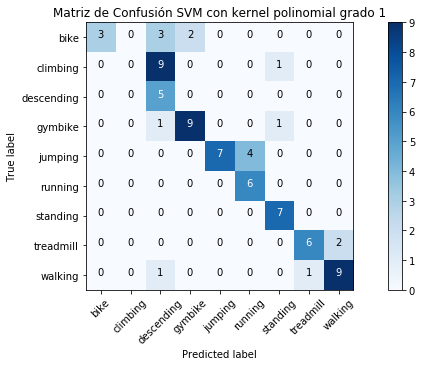

In [14]:
print('Support Vector Machine')
print('-------------------------------------------------')
result=[]
result.append(svm_poly(x_train,y_train,x_val,y_val,deg=1))
result.append(svm_poly(x_train,y_train,x_val,y_val,deg=2))
result.append(svm_poly(x_train,y_train,x_val,y_val,deg=3))
best_acc,best_deg=0,0
best_cm=None
for i in range(0,3):
    if result[i][1]>best_acc:
        best_acc=result[i][1]
        best_cm=result[i][0]
        best_deg=result[i][2]
title='Matriz de Confusión SVM con kernel polinomial grado '+str(best_deg)
plot_confusion_matrix(best_cm,Activities,title=title)
print('Clasificaciones exitosas: {}%'.format(acc*100))

Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 87.01298701298701%


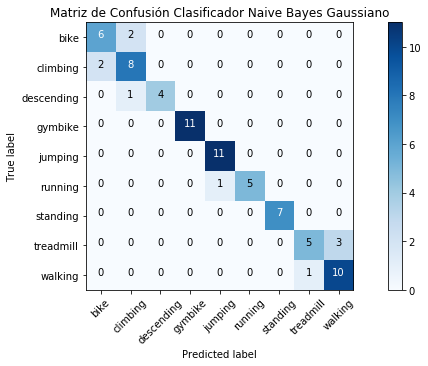

In [15]:
std_scale=skl.preprocessing.StandardScaler().fit(x_train)
x_train_n = std_scale.transform(x_train)
clf = GaussianNB().fit(x_train_n, y_train)
x_val_n = std_scale.transform(x_val)
print('Gaussian Naive Bayes')
print('-------------------------------------------------')
y_pred=clf.predict(x_val_n)
c_m=confusion_matrix(np.ravel(y_val), y_pred)
acc=accuracy_score(np.ravel(y_val), y_pred)
title='Matriz de Confusión Clasificador Naive Bayes Gaussiano'
plot_confusion_matrix(c_m,Activities,title=title)
print('Clasificaciones exitosas: {}%'.format(acc*100))

## Segunda Selección de Caracteríticas

In [17]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(score_func=mutual_info_classif,k=5).fit(x_train, y_train)
x4= sel.transform(x3)
print('feature size: {} ---> {}'.format(len(x3[0]),len(x4[0])))
scores=sel.scores_
feature_s=len(x3[0])
features=np.arange(0,feature_s,1)

feature size: 10 ---> 5


Neural Network
-------------------------------------------------
Clasificaciones exitosas: 84.4155844155844%


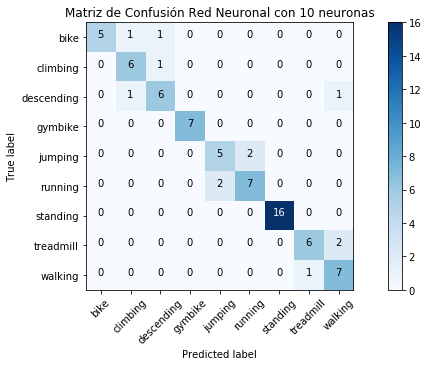

In [18]:
print('Neural Network')
print('-------------------------------------------------')
best_cm=None
best_acc,best_hls=0,0
for i in range(0,3):
    clf,x_train,x_val,y_train,y_val=ANN_train(x4,y,hl_size=hl_s[i])
    y_pred=clf.predict(x_val)
    c_m=confusion_matrix(np.ravel(y_val), y_pred)
    acc=accuracy_score(y_val, y_pred)
    if acc>best_acc:
        best_acc=acc
        best_cm=c_m
        best_hls=hl_s[i]
title='Matriz de Confusión Red Neuronal con '+str(best_hls)+ ' neuronas'
plot_confusion_matrix(best_cm,Activities,normalize=False,title=title)
print('Clasificaciones exitosas: {}%'.format(best_acc*100))

Support Vector Machine
-------------------------------------------------
Clasificaciones exitosas: 76.62337662337663%


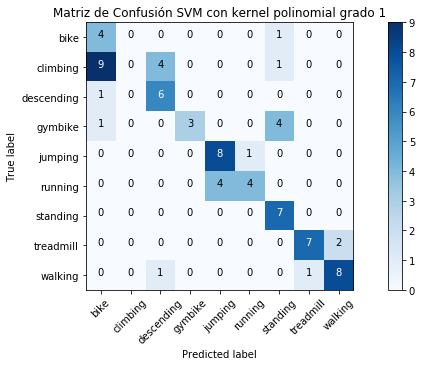

In [19]:
print('Support Vector Machine')
print('-------------------------------------------------')
result=[]
result.append(svm_poly(x_train,y_train,x_val,y_val,deg=1))
result.append(svm_poly(x_train,y_train,x_val,y_val,deg=2))
result.append(svm_poly(x_train,y_train,x_val,y_val,deg=3))
best_acc,best_deg=0,0
best_cm=None
for i in range(0,3):
    if result[i][1]>best_acc:
        best_acc=result[i][1]
        best_cm=result[i][0]
        best_deg=result[i][2]
title='Matriz de Confusión SVM con kernel polinomial grado '+str(best_deg)
plot_confusion_matrix(best_cm,Activities,title=title)
print('Clasificaciones exitosas: {}%'.format(acc*100))

Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 77.92207792207793%


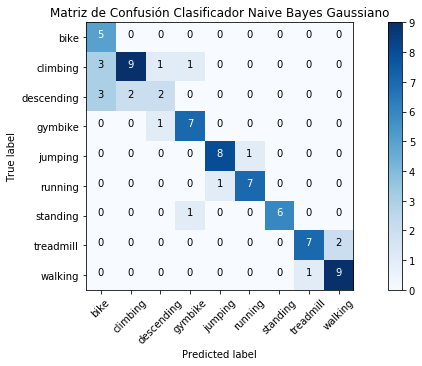

In [20]:
std_scale=skl.preprocessing.StandardScaler().fit(x_train)
x_train_n = std_scale.transform(x_train)
clf = GaussianNB().fit(x_train_n, y_train)
x_val_n = std_scale.transform(x_val)
print('Gaussian Naive Bayes')
print('-------------------------------------------------')
y_pred=clf.predict(x_val_n)
c_m=confusion_matrix(np.ravel(y_val), y_pred)
acc=accuracy_score(np.ravel(y_val), y_pred)
title='Matriz de Confusión Clasificador Naive Bayes Gaussiano'
plot_confusion_matrix(c_m,Activities,title=title)
print('Clasificaciones exitosas: {}%'.format(acc*100))